In [14]:
%pylab inline
import mdtraj as md
from msmbuilder.featurizer import RawPositionsFeaturizer
from msmbuilder.decomposition import PCA
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
rc('font', family='serif', size=15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
top_r2 = md.load('/home/gerry/heat/structures/r2-unbound.pdb')
top_h = md.load('/home/gerry/heat/structures/H-unbound.pdb')

# h

In [3]:
traj_h = []
for i in range(0,8):
    traj = md.load('./1222/H_unbound/pro_xtc/300k'+str(i)+'_pro_30.xtc', top=top_h)
    traj.superpose(top_h)
    traj_h.append(traj)

In [4]:
featurizer = RawPositionsFeaturizer(atom_indices=top_h.topology.select('name CA'))
feat_h = featurizer.fit_transform(traj_h)

In [5]:
pca_h = PCA()
pca_h_out = pca_h.fit_transform(feat_h)

/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


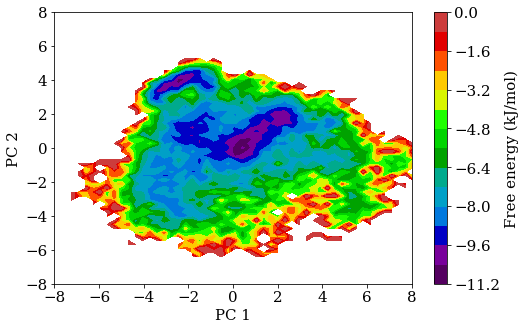

In [15]:
figure(figsize(8,5))
z,x,y = np.histogram2d(vstack(pca_h_out)[:,0], vstack(pca_h_out)[:,1], bins=50)
F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
contourf(F.T, 15, cmap=plt.cm.spectral, extent=extent)
clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('PC 1')
ylabel('PC 2')
xticks(range(-8,9,2))
xlim(-8,8)
yticks(range(-8,9,2))

savefig('fig_src/fes_h.png',format='png',dpi=600)

# r2

In [7]:
traj_r2 = []
for i in range(0,8):
    traj = md.load('./1222/R2_unbound/pro_xtc/300k'+str(i)+'_pro_30.xtc', top=top_r2)
    traj.superpose(top_r2)
    traj_r2.append(traj)

In [8]:
featurizer = RawPositionsFeaturizer(atom_indices=top_r2.topology.select('name CA'))
feat_r2 = featurizer.fit_transform(traj_r2)

In [9]:
pca_r2 = PCA()
pca_r2_out = pca_r2.fit_transform(feat_r2)

/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


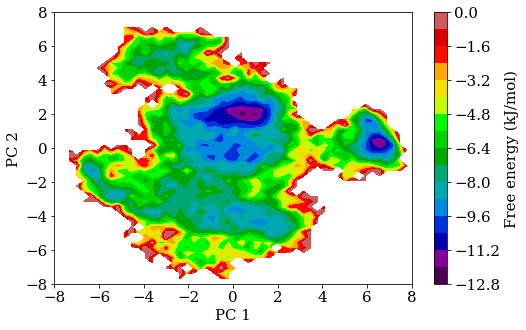

In [16]:
figure(figsize(8,5))
z,x,y = np.histogram2d(vstack(pca_r2_out)[:,0], vstack(pca_r2_out)[:,1], bins=50)
F = -2.5*np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
contourf(F.T, 15, cmap=plt.cm.spectral, extent=extent)
clb = colorbar()
clb.set_label('Free energy (kJ/mol)')
xlabel('PC 1')
ylabel('PC 2')
xticks(range(-8,9,2))
yticks(range(-8,9,2))

savefig('fig_src/fes_r2.png',format='png',dpi=600)

# plot

[ 8.64899731  7.9542737   4.64693022  3.99602437  2.89084411  2.5926404
  2.32117748  1.70195627  1.31620777  1.06577253]
[ 7.40728474  5.23939276  3.47346044  2.58980656  1.77169752  1.46018386
  1.26892662  0.8738879   0.82196021  0.62423474]


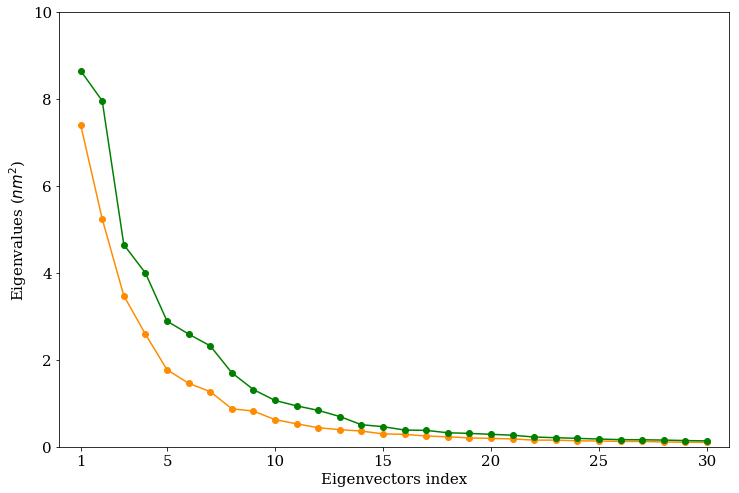

In [17]:
figure(figsize=(12,8))
plot(pca_h.explained_variance_[0:30], color='darkorange', marker='o')
plot(pca_r2.explained_variance_[0:30], color='g', marker='o')


xticks([0,4,9,14,19,24,29],['1','5','10','15','20','25','30'])
xlim(-1,30)
xlabel('Eigenvectors index')
ylabel('Eigenvalues ($nm^2$)')
ylim(0,10)

print pca_r2.explained_variance_[0:10]
print pca_h.explained_variance_[0:10]

savefig('fig_src/Eigenvalues.png',format='png',dpi=600)

In [12]:
print cumsum(pca_h.explained_variance_)[-1]
print cumsum(pca_r2.explained_variance_)[-1]

33.5084
48.5182


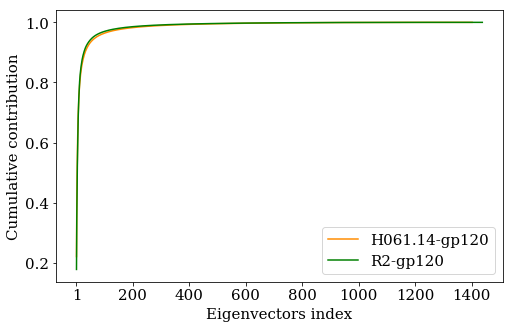

In [18]:
rc('font', family='serif', size=15)
figure(figsize=(8,5))
plot(cumsum(pca_h.explained_variance_ratio_), color='darkorange', label='H061.14-gp120')
plot(cumsum(pca_r2.explained_variance_ratio_), color='g', label='R2-gp120')

xticks([0,199,399,599,799,999,1199,1399],['1','200','400','600','800','1000','1200','1400'])
xlabel('Eigenvectors index')
ylabel('Cumulative contribution')
legend()

savefig('fig_src/contribution.png',format='png',dpi=600)

[ 0.22105791  0.37741873  0.4810783   0.55836672  0.61124003  0.65481675
  0.69268572  0.71876544  0.74329543  0.76192468]
[ 0.17826311  0.34220737  0.43798453  0.52034593  0.57992864  0.63336515
  0.68120658  0.71628535  0.74341351  0.76537997]


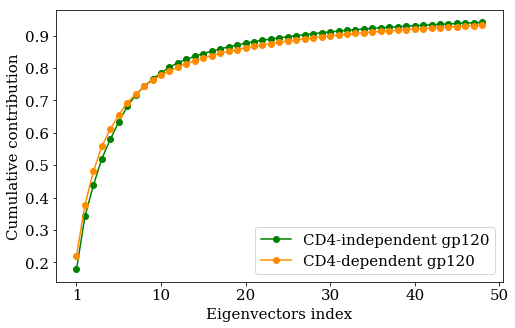

In [20]:
rc('font', family='serif', size=15)
figure(figsize=(8,5))
plot(cumsum(pca_r2.explained_variance_ratio_[0:49]), color='g', marker='o', label='CD4-independent gp120')
plot(cumsum(pca_h.explained_variance_ratio_[0:49]), color='darkorange', marker='o', label='CD4-dependent gp120')

xlabel('Eigenvectors index')
xticks([0,10,20,30,40,50],['1','10','20','30','40','50'])
ylabel('Cumulative contribution')
legend()

print cumsum(pca_h.explained_variance_ratio_[0:10])
print cumsum(pca_r2.explained_variance_ratio_[0:10])